<a href="https://colab.research.google.com/github/YangTaeSung/CAU-MachineLearning/blob/master/assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random

file_data	= "mnist_test.csv"
handle_file	= open(file_data, "r")
data = handle_file.readlines()
handle_file.close()

size_row = 28    # height of the image
size_col = 28    # width of the image

num_image	= len(data)
count = 0     # count for the number of images


# normalize the values of the input data to be [0, 1]
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

# make a matrix each column of which represents an images in a vector form
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int) # empty( 10000 )

# make a matrix of L2 Norm (0 to 9)
# Initialize to 0
L2_Norm  = np.zeros((size_row * size_col, 10), dtype=float) 


# label counter
# Initialize to 0
cnt = np.zeros((size_row * size_col, 10), dtype=float)



for line in data:
    line_data = line.split(',') 
    label = int(line_data[0])   # Convert string to integer type
    im_vector = np.asfarray(line_data[1:])
    im_vector = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector
    
    L2_Norm[:, label] += im_vector     #  Sum
    cnt[:, label] += 1                 #  n Count
    
    count += 1

In [0]:
L2_Norm = L2_Norm / cnt  #  Divide n

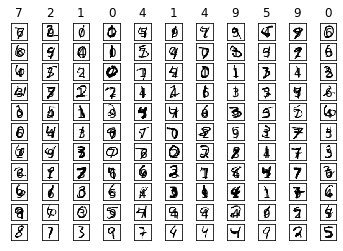

In [234]:
# plot first 121 images out of 10,000 with their labels
f1 = plt.figure(1)

for i in range(121):

    label = list_label[i]
    im_vector = list_image[:, i]
    im_matrix = im_vector.reshape((size_row, size_col))

    plt.subplot(11, 11, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [235]:
'''for i in range(10):

    label = i
    im_matrix = L2_Norm[:, i].reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()'''

"for i in range(10):\n\n    label = i\n    im_matrix = L2_Norm[:, i].reshape((size_row, size_col))\n\n    plt.subplot(2, 5, i+1)\n    plt.title(label)\n    plt.imshow(im_matrix, cmap='Greys', interpolation='None')\n\n    frame = plt.gca()\n    frame.axes.get_xaxis().set_visible(False)\n    frame.axes.get_yaxis().set_visible(False)\n\nplt.show()"

In [236]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

xNum = 28*28

theta = []
y = []
z = []
zSum = np.zeros(10, dtype=float)

for i in range(xNum):
  theta.append(random.random())

theta = np.array(theta)

for j in range(num_image):
  y = np.sum(list_image[:,j] * (theta / 100))
  # 각 label당 출력되는 output 차이가 미미하여 theta값을 줄였습니다.
  z.append(sigmoid(y))

for k in range(num_image):
  zSum[list_label[k]] += z[k]

'''
print(zSum)
print (zSum/cnt[0,:])
'''

'\nprint(zSum)\nprint (zSum/cnt[0,:])\n'

***
***
# **RESULT**
***
***

# 1. Plot the average image 

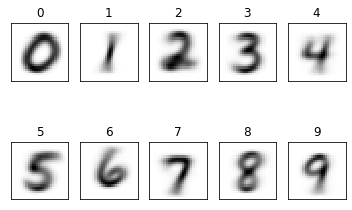

In [237]:
for i in range(10):

    label = i
    im_matrix = L2_Norm[:, i].reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# 2. Present the output of the neural network with random weights 

In [239]:
for i in range(10):
  print("Label ", i, " : ", zSum[i]/cnt[0,i])

Label  0  :  0.6617237141213023
Label  1  :  0.5795142178007651
Label  2  :  0.6431761886227731
Label  3  :  0.64494715403004
Label  4  :  0.6159831865632333
Label  5  :  0.6288237152371592
Label  6  :  0.6367407483530092
Label  7  :  0.6151622365301428
Label  8  :  0.647247784716285
Label  9  :  0.6217236245028707


.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.  
.
